<a href="https://colab.research.google.com/github/karloxkronfeld/Banderas/blob/master/Precio%2Ctrade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [372]:
import pandas as pd
from pylab import *
from pandas_datareader import data
import plotly.express as px
import plotly.graph_objects as go

In [477]:
start="2010-01-01"
end="2020-08-01"
SRC_data="coca.pkl"
try:
    datos=pd.read_pickle(SRC_data)
except FileNotFoundError:
    datos=data.DataReader("DNR","yahoo",start,end)
    datos.to_pickle(SRC_data)

In [478]:
alpha=pd.DataFrame(index=datos.index)
alpha["precio"]=datos["Adj Close"]
alpha["diferencia"]=alpha.precio.diff()
alpha["alpha"]=where(alpha.diferencia>=0,1,0)
alpha["posicion"]=alpha.alpha.diff(0)

In [480]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=alpha.index,y=alpha.precio))
fig.add_trace(go.Scatter(x=alpha.loc[alpha.posicion==1].index,
        y=alpha.precio[alpha.posicion==1],
        mode="markers"))
fig.add_trace(go.Scatter(x=alpha.loc[alpha.posicion==-1].index,
        y=alpha.precio[alpha.posicion==-1],
        mode="markers"))
fig.show()

In [481]:
capital_inicial=1000
posicion=pd.DataFrame(index=alpha.index).fillna(0)
posicion["accion"]=alpha.alpha
portafolio=pd.DataFrame(index=alpha.index)
portafolio["posicion"]=posicion.multiply(alpha.precio,axis=0)
portafolio["cash"]= capital_inicial-(
    posicion.diff().multiply(alpha.precio,axis=0)).cumsum()
portafolio["TOTAL"]=portafolio.posicion + portafolio.cash
portafolio.plot(figsize=(13,7))
text(portafolio.index[-1],portafolio.cash[-1],portafolio.cash[-1])
text(portafolio.index[-1],portafolio.posicion[-1],portafolio.posicion[-1])
text(portafolio.index[-1],portafolio.TOTAL[-1],portafolio.TOTAL[-1])
hlines(capital_inicial,portafolio.index[0],portafolio.index[-1],color="r",lw=3)

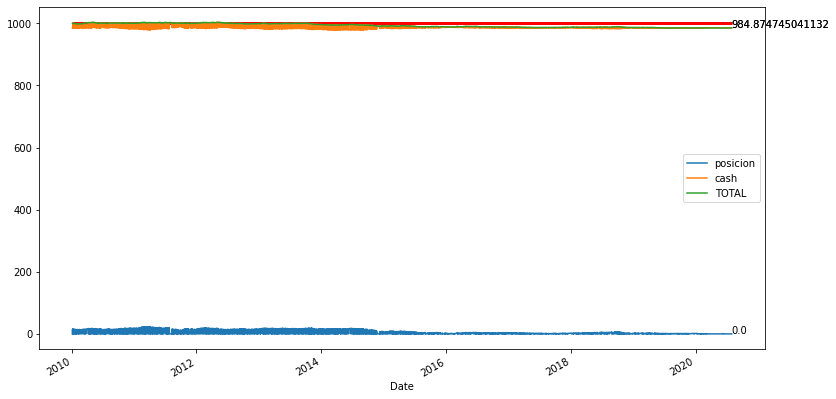

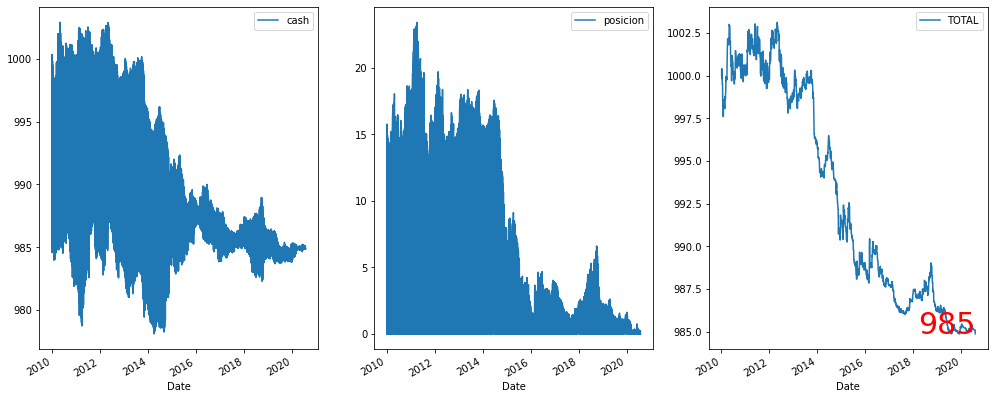

In [483]:
fig=figure(figsize=(17,7),frameon=False)
# tick_params(colors='w')
fig.add_axes  

fig.add_subplot(131)
portafolio.cash.plot()
legend()
fig.add_subplot(132)
portafolio.posicion.plot()
legend()
fig.add_subplot(133)
portafolio.TOTAL.plot()
text(portafolio.index[-1],portafolio.TOTAL[-1],f'{portafolio.TOTAL[-1]:,.0f}',
     size=30,ha="right",color=color_letra)
legend()
show()

In [484]:
portafolio[portafolio.TOTAL==portafolio.TOTAL.max()]

,posicion,cash,TOTAL
Date,,,
2012-05-01,18.381582,984.738554,1003.120136


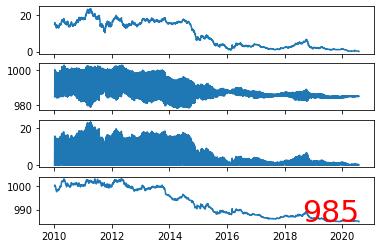

In [485]:
if portafolio.TOTAL[-1]>1000:
  color_letra="g"
else:
  color_letra="r"

fig,ax=subplots(4,sharex="col")
ax[0].plot(alpha.precio)

ax[1].plot(portafolio.cash,label="cash")

ax[2].plot(portafolio.posicion,label="posicion")

ax[3].plot(portafolio.TOTAL,label="Total")
text(portafolio.index[-1],portafolio.TOTAL[-1],f'{portafolio.TOTAL[-1]:,.0f}',
     size=30,ha="right",color=color_letra)
show()